In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [10]:
df = pd.read_csv('/Users/adishsundar/Desktop/AI Research/salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,EN,FT,Data Analyst,75000,USD,75000,US,100,US,M
1,2023,EN,FT,Data Analyst,60000,USD,60000,US,100,US,M
2,2023,MI,FT,Analytics Engineer,185700,USD,185700,US,0,US,M
3,2023,MI,FT,Analytics Engineer,165000,USD,165000,US,0,US,M
4,2023,SE,FT,Data Engineer,160000,USD,160000,US,100,US,M


In [9]:
# Exploring the growth of the AI/ML Industry in terms of salaries, 2020 - 2023. Explosive growth in 2021.

# Group the data by work year and calculate the average salary
avg_salary_by_year = df.groupby('work_year')['salary_in_usd'].mean().reset_index()

# Create the time series graph
fig = px.line(avg_salary_by_year, x='work_year', y='salary_in_usd')
fig.update_layout(
    title='Average Salary by Year for AI/ML related jobs',
    xaxis_title='Year',
    yaxis_title='Average Salary (USD)',
    plot_bgcolor='rgb(17, 17, 17)',  # Dark background color
    paper_bgcolor='rgb(17, 17, 17)',  # Dark background color
    font_color='white'  # Font color
)

# Display the graph
fig.show()

In [118]:
# 2022 Data from BLS

income_2022 = pd.read_csv('/Users/adishsundar/Desktop/AI Research/cpsaat39.csv')
income_2022.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Occupation,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Total_workers,Total_weekly_earnings,M_workers,M_weekly_earnings,F_workers,F_weekly_earnings


In [119]:
df = income_2022.copy()

# Set the first non-null row as the column headers
new_header = df.iloc[4]
df = df[5:]
df.columns = new_header

# Remove rows with '-' values
df = df.replace('–', np.nan)

# Remove rows with all NaN values
df.dropna(inplace=True)

# Reset the index
df.reset_index(drop=True, inplace=True)

# Change first column name to Occupations
df.rename(columns={df.columns[0]: 'Occupations'}, inplace=True)

# Display the cleaned DataFrame
df.head()

4,Occupations,Total_workers,Total_weekly_earnings,M_workers,M_weekly_earnings,F_workers,F_weekly_earnings
0,"Total, full-time wage and salary workers","118,869","$1,059","65,554","$1,154","53,315",$958
1,"Management, professional, and related occupations","53,962","1,465","26,229","1,726","27,733","1,284"
2,"Management, business, and financial operations...","22,707","1,569","12,079","1,772","10,629","1,409"
3,Management occupations,"14,909","1,658","8,532","1,868","6,376","1,457"
4,Chief executives,"1,249","2,701",878,"2,908",370,"2,277"


In [120]:
# Remove commas and dollar signs from the necessary columns
df['Total_workers'] = df['Total_workers'].str.replace(',', '').astype(int)
df['Total_weekly_earnings'] = df['Total_weekly_earnings'].str.replace(',', '').str.replace('$', '').astype(int)
df['M_workers'] = df['M_workers'].str.replace(',', '').astype(int)
df['M_weekly_earnings'] = df['M_weekly_earnings'].str.replace(',', '').str.replace('$', '').astype(int)
df['F_workers'] = df['F_workers'].str.replace(',', '').astype(int)
df['F_weekly_earnings'] = df['F_weekly_earnings'].str.replace(',', '').str.replace('$', '').astype(int)

# Create the new columns for annual salaries
df['Total_Annual_Salary'] = df['Total_weekly_earnings'] * 52
df['Male_Annual_Salary'] = df['M_weekly_earnings'] * 52
df['Female_Annual_Salary'] = df['F_weekly_earnings'] * 52

# Print the updated DataFrame
df.head()

/var/folders/bn/cbv7ftpx4cx24wl0rz52v1z00000gn/T/ipykernel_87493/3088555579.py:3: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

/var/folders/bn/cbv7ftpx4cx24wl0rz52v1z00000gn/T/ipykernel_87493/3088555579.py:5: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

/var/folders/bn/cbv7ftpx4cx24wl0rz52v1z00000gn/T/ipykernel_87493/3088555579.py:7: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



4,Occupations,Total_workers,Total_weekly_earnings,M_workers,M_weekly_earnings,F_workers,F_weekly_earnings,Total_Annual_Salary,Male_Annual_Salary,Female_Annual_Salary
0,"Total, full-time wage and salary workers",118869,1059,65554,1154,53315,958,55068,60008,49816
1,"Management, professional, and related occupations",53962,1465,26229,1726,27733,1284,76180,89752,66768
2,"Management, business, and financial operations...",22707,1569,12079,1772,10629,1409,81588,92144,73268
3,Management occupations,14909,1658,8532,1868,6376,1457,86216,97136,75764
4,Chief executives,1249,2701,878,2908,370,2277,140452,151216,118404


In [191]:
# Create the Income_Class column based on Total Annual Salary
income_bins = [0, 30000, 50000, 70000, 90000, float('inf')]
income_labels = ['Lower Class', 'Lower Middle Class', 'Middle Class', 'Upper Middle Class', 'Upper Class']
df['Income_Class'] = pd.cut(df['Total_Annual_Salary'], bins=income_bins, labels=income_labels)

# Display the DataFrame
df['Year'] = 2022
df.head()

4,Occupations,Total_workers,Total_weekly_earnings,M_workers,M_weekly_earnings,F_workers,F_weekly_earnings,Total_Annual_Salary,Male_Annual_Salary,Female_Annual_Salary,Income_Class,Year
0,"Total, full-time wage and salary workers",118869,1059,65554,1154,53315,958,55068,60008,49816,Middle Class,2022
1,"Management, professional, and related occupations",53962,1465,26229,1726,27733,1284,76180,89752,66768,Upper Middle Class,2022
2,"Management, business, and financial operations...",22707,1569,12079,1772,10629,1409,81588,92144,73268,Upper Middle Class,2022
3,Management occupations,14909,1658,8532,1868,6376,1457,86216,97136,75764,Upper Middle Class,2022
4,Chief executives,1249,2701,878,2908,370,2277,140452,151216,118404,Upper Class,2022


In [175]:
income_2021 = pd.read_csv('/Users/adishsundar/Desktop/AI Research/2021.csv')
income_2020 = pd.read_csv('/Users/adishsundar/Desktop/AI Research/2020.csv')
income_2019 = pd.read_csv('/Users/adishsundar/Desktop/AI Research/2019.csv')
income_2018 = pd.read_csv('/Users/adishsundar/Desktop/AI Research/2018.csv')

In [192]:
df_2 = income_2021.copy()

# Set the first non-null row as the column headers
new_header = df_2.iloc[4]
df_2 = df_2[5:]
df_2.columns = new_header

# Change first column name to Occupations
df_2.rename(columns={df_2.columns[0]: 'Occupations'}, inplace=True)
df_2 = df_2.iloc[:, :-2]

# Remove rows with '-' values
df_2 = df_2.replace('–', np.nan)

# Remove rows with all NaN values
df_2.dropna(inplace=True)

# Reset the index
df_2.reset_index(drop=True, inplace=True)

# Remove commas and dollar signs from the necessary columns
df_2['Total_workers'] = df_2['Total_workers'].str.replace(',', '').astype(int)
df_2['Total_weekly_earnings'] = df_2['Total_weekly_earnings'].str.replace(',', '').str.replace('$', '').astype(int)
df_2['M_workers'] = df_2['M_workers'].str.replace(',', '').astype(int)
df_2['M_weekly_earnings'] = df_2['M_weekly_earnings'].str.replace(',', '').str.replace('$', '').astype(int)
df_2['F_workers'] = df_2['F_workers'].str.replace(',', '').astype(int)
df_2['F_weekly_earnings'] = df_2['F_weekly_earnings'].str.replace(',', '').str.replace('$', '').astype(int)

# Create the new columns for annual salaries
df_2['Total_Annual_Salary'] = df_2['Total_weekly_earnings'] * 52
df_2['Male_Annual_Salary'] = df_2['M_weekly_earnings'] * 52
df_2['Female_Annual_Salary'] = df_2['F_weekly_earnings'] * 52

# Create the Income_Class column based on Total Annual Salary
income_bins = [0, 30000, 50000, 70000, 90000, float('inf')]
income_labels = ['Lower Class', 'Lower Middle Class', 'Middle Class', 'Upper Middle Class', 'Upper Class']
df_2['Income_Class'] = pd.cut(df_2['Total_Annual_Salary'], bins=income_bins, labels=income_labels)

# Print the updated DataFrame
df_2['Year'] = 2021
df_2.head()

/var/folders/bn/cbv7ftpx4cx24wl0rz52v1z00000gn/T/ipykernel_87493/3812538851.py:23: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

/var/folders/bn/cbv7ftpx4cx24wl0rz52v1z00000gn/T/ipykernel_87493/3812538851.py:25: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

/var/folders/bn/cbv7ftpx4cx24wl0rz52v1z00000gn/T/ipykernel_87493/3812538851.py:27: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



4,Occupations,Total_workers,Total_weekly_earnings,M_workers,M_weekly_earnings,F_workers,F_weekly_earnings,Total_Annual_Salary,Male_Annual_Salary,Female_Annual_Salary,Income_Class,Year
0,"Total, full-time wage and salary workers",114316,998,62928,1097,51388,912,51896,57044,47424,Middle Class,2021
1,"Management, professional, and related occupations",51166,1390,24561,1609,26605,1222,72280,83668,63544,Upper Middle Class,2021
2,"Management, business, and financial operations...",21529,1482,11231,1672,10299,1306,77064,86944,67912,Upper Middle Class,2021
3,Management occupations,13942,1546,7826,1752,6116,1341,80392,91104,69732,Upper Middle Class,2021
4,Chief executives,1151,2473,803,2721,348,1904,128596,141492,99008,Upper Class,2021


In [193]:
df_3 = income_2020.copy()

# Set the first non-null row as the column headers
new_header = df_3.iloc[4]
df_3 = df_3[5:]
df_3.columns = new_header

# Change first column name to Occupations
df_3.rename(columns={df_3.columns[0]: 'Occupations'}, inplace=True)

# Remove rows with '-' values
df_3 = df_3.replace('–', np.nan)

# Remove rows with all NaN values
df_3.dropna(inplace=True)

# Reset the index
df_3.reset_index(drop=True, inplace=True)

df_3.head()

# Remove commas and dollar signs from the necessary columns
df_3['Total_workers'] = df_3['Total_workers'].str.replace(',', '').astype(int)
df_3['Total_weekly_earnings'] = df_3['Total_weekly_earnings'].str.replace(',', '').str.replace('$', '').astype(int)
df_3['M_workers'] = df_3['M_workers'].str.replace(',', '').astype(int)
df_3['M_weekly_earnings'] = df_3['M_weekly_earnings'].str.replace(',', '').str.replace('$', '').astype(int)
df_3['F_workers'] = df_3['F_workers'].str.replace(',', '').astype(int)
df_3['F_weekly_earnings'] = df_3['F_weekly_earnings'].str.replace(',', '').str.replace('$', '').astype(int)

# Create the new columns for annual salaries
df_3['Total_Annual_Salary'] = df_3['Total_weekly_earnings'] * 52
df_3['Male_Annual_Salary'] = df_3['M_weekly_earnings'] * 52
df_3['Female_Annual_Salary'] = df_3['F_weekly_earnings'] * 52

# Create the Income_Class column based on Total Annual Salary
income_bins = [0, 30000, 50000, 70000, 90000, float('inf')]
income_labels = ['Lower Class', 'Lower Middle Class', 'Middle Class', 'Upper Middle Class', 'Upper Class']
df_3['Income_Class'] = pd.cut(df_3['Total_Annual_Salary'], bins=income_bins, labels=income_labels)

# Print the updated DataFrame
df_3['Year'] = 2020
df_3.head()

/var/folders/bn/cbv7ftpx4cx24wl0rz52v1z00000gn/T/ipykernel_87493/1381171167.py:24: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

/var/folders/bn/cbv7ftpx4cx24wl0rz52v1z00000gn/T/ipykernel_87493/1381171167.py:26: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

/var/folders/bn/cbv7ftpx4cx24wl0rz52v1z00000gn/T/ipykernel_87493/1381171167.py:28: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



4,Occupations,Total_workers,Total_weekly_earnings,M_workers,M_weekly_earnings,F_workers,F_weekly_earnings,Total_Annual_Salary,Male_Annual_Salary,Female_Annual_Salary,Income_Class,Year
0,"Total, full-time wage and salary workers",110387,984,60911,1082,49476,891,51168,56264,46332,Middle Class,2020
1,"Management, professional, and related occupations",50023,1356,24090,1578,25933,1164,70512,82056,60528,Upper Middle Class,2020
2,"Management, business, and financial operations...",20811,1461,11082,1667,9729,1274,75972,86684,66248,Upper Middle Class,2020
3,Management occupations,13517,1541,7770,1737,5747,1347,80132,90324,70044,Upper Middle Class,2020
4,Chief executives,1157,2402,794,2712,363,2051,124904,141024,106652,Upper Class,2020


In [194]:
df_4 = income_2019.copy()

# Set the first non-null row as the column headers
new_header = df_4.iloc[4]
df_4 = df_4[5:]
df_4.columns = new_header

# Change first column name to Occupations
df_4.rename(columns={df_4.columns[0]: 'Occupations'}, inplace=True)

# Remove rows with '-' values
df_4 = df_4.replace('–', np.nan)

# Remove rows with all NaN values
df_4.dropna(inplace=True)

# Reset the index
df_4.reset_index(drop=True, inplace=True)

# Remove commas and dollar signs from the necessary columns
df_4['Total_workers'] = df_4['Total_workers'].str.replace(',', '').astype(int)
df_4['Total_weekly_earnings'] = df_4['Total_weekly_earnings'].str.replace(',', '').str.replace('$', '').astype(int)
df_4['M_workers'] = df_4['M_workers'].str.replace(',', '').astype(int)
df_4['M_weekly_earnings'] = df_4['M_weekly_earnings'].str.replace(',', '').str.replace('$', '').astype(int)
df_4['F_workers'] = df_4['F_workers'].str.replace(',', '').astype(int)
df_4['F_weekly_earnings'] = df_4['F_weekly_earnings'].str.replace(',', '').str.replace('$', '').astype(int)

# Create the new columns for annual salaries
df_4['Total_Annual_Salary'] = df_4['Total_weekly_earnings'] * 52
df_4['Male_Annual_Salary'] = df_4['M_weekly_earnings'] * 52
df_4['Female_Annual_Salary'] = df_4['F_weekly_earnings'] * 52

# Create the Income_Class column based on Total Annual Salary
income_bins = [0, 30000, 50000, 70000, 90000, float('inf')]
income_labels = ['Lower Class', 'Lower Middle Class', 'Middle Class', 'Upper Middle Class', 'Upper Class']
df_4['Income_Class'] = pd.cut(df_4['Total_Annual_Salary'], bins=income_bins, labels=income_labels)

# Print the updated DataFrame
df_4['Year'] = 2019
df_4.head()

/var/folders/bn/cbv7ftpx4cx24wl0rz52v1z00000gn/T/ipykernel_87493/1334716522.py:22: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

/var/folders/bn/cbv7ftpx4cx24wl0rz52v1z00000gn/T/ipykernel_87493/1334716522.py:24: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

/var/folders/bn/cbv7ftpx4cx24wl0rz52v1z00000gn/T/ipykernel_87493/1334716522.py:26: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



4,Occupations,Total_workers,Total_weekly_earnings,M_workers,M_weekly_earnings,F_workers,F_weekly_earnings,Total_Annual_Salary,Male_Annual_Salary,Female_Annual_Salary,Income_Class,Year
0,"Total, full-time wage and salary workers",117584,917,65007,1007,52577,821,47684,52364,42692,Lower Middle Class,2019
1,"Management, professional, and related occupations",50119,1309,24260,1539,25859,1135,68068,80028,59020,Middle Class,2019
2,"Management, business, and financial operations...",20696,1415,11111,1598,9585,1221,73580,83096,63492,Upper Middle Class,2019
3,Management occupations,13948,1478,8002,1659,5946,1266,76856,86268,65832,Upper Middle Class,2019
4,Chief executives,1113,2380,812,2509,302,2019,123760,130468,104988,Upper Class,2019


In [195]:
df_5 = income_2018.copy()

# Set the first non-null row as the column headers
new_header = df_5.iloc[4]
df_5 = df_5[5:]
df_5.columns = new_header

# Change first column name to Occupations
df_5.rename(columns={df_5.columns[0]: 'Occupations'}, inplace=True)

# Remove rows with '-' values
df_5 = df_5.replace('–', np.nan)

# Remove rows with all NaN values
df_5.dropna(inplace=True)

# Reset the index
df_5.reset_index(drop=True, inplace=True)

print(df_5.columns)

# Remove commas and dollar signs from the necessary columns
df_5['Total_workers'] = df_5['Total_workers'].str.replace(',', '').astype(int)
df_5['Total_weekly_earnings'] = df_5['Total_weekly_earnings'].str.replace(',', '').str.replace('$', '').astype(int)
df_5['M_workers'] = df_5[' M_workers'].str.replace(',', '').astype(int)
df_5['M_weekly_earnings'] = df_5['M_weekly_earnings'].str.replace(',', '').str.replace('$', '').astype(int)
df_5['F_workers'] = df_5['F_workers'].str.replace(',', '').astype(int)
df_5['F_weekly_earnings'] = df_5['F_weekly_earnings'].str.replace(',', '').str.replace('$', '').astype(int)

# Create the new columns for annual salaries
df_5['Total_Annual_Salary'] = df_5['Total_weekly_earnings'] * 52
df_5['Male_Annual_Salary'] = df_5['M_weekly_earnings'] * 52
df_5['Female_Annual_Salary'] = df_5['F_weekly_earnings'] * 52

# Create the Income_Class column based on Total Annual Salary
income_bins = [0, 30000, 50000, 70000, 90000, float('inf')]
income_labels = ['Lower Class', 'Lower Middle Class', 'Middle Class', 'Upper Middle Class', 'Upper Class']
df_5['Income_Class'] = pd.cut(df_5['Total_Annual_Salary'], bins=income_bins, labels=income_labels)

# Print the updated DataFrame
df_5['Year'] = 2018
df_5.head()

Index(['Occupations', 'Total_workers', 'Total_weekly_earnings', ' M_workers',
       'M_weekly_earnings', 'F_workers', 'F_weekly_earnings'],
      dtype='object', name=4)


/var/folders/bn/cbv7ftpx4cx24wl0rz52v1z00000gn/T/ipykernel_87493/3682398751.py:24: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

/var/folders/bn/cbv7ftpx4cx24wl0rz52v1z00000gn/T/ipykernel_87493/3682398751.py:26: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

/var/folders/bn/cbv7ftpx4cx24wl0rz52v1z00000gn/T/ipykernel_87493/3682398751.py:28: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



4,Occupations,Total_workers,Total_weekly_earnings,M_workers,M_weekly_earnings,F_workers,F_weekly_earnings,M_workers,Total_Annual_Salary,Male_Annual_Salary,Female_Annual_Salary,Income_Class,Year
0,"Total, full-time wage and salary workers",115567,886,"64,142",973,51425,789,64142,46072,50596,41028,Lower Middle Class,2018
1,"Management, professional, and related occupations",48808,1246,"23,685",1468,25123,1078,23685,64792,76336,56056,Middle Class,2018
2,"Management, business, and financial operations...",19863,1355,"10,668",1537,9195,1168,10668,70460,79924,60736,Upper Middle Class,2018
3,Management occupations,13477,1429,"7,754",1585,5724,1236,7754,74308,82420,64272,Upper Middle Class,2018
4,Chief executives,1098,2291,790,2488,307,1736,790,119132,129376,90272,Upper Class,2018


In [107]:
# Calculate the percentage of each income class
class_counts = df['Income_Class'].value_counts()
total_records = class_counts.sum()
class_percentages = class_counts / total_records * 100

# Create the bar chart
fig = go.Figure(data=[
    go.Bar(
        x=class_percentages.index,
        y=class_percentages.values,
        marker_color='purple'  # Black color for bars
    )
])

# Customize the layout
fig.update_layout(
    title='Percentage of Records by Income Class',
    xaxis_title='Income Class',
    yaxis_title='Percentage',
    plot_bgcolor='rgb(17, 17, 17)',  # Dark background color
    paper_bgcolor='rgb(17, 17, 17)',  # Dark background color for the entire plot
    font=dict(color='white'),  # White font color
)

# Display the chart
fig.show()

In [108]:
# Looking at 162 total occupations

# Group occupations by income class
grouped = df.groupby('Income_Class')['Occupations'].apply(list)

# Output the occupations by income class
for income_class, occupations in grouped.items():
    print(f'Income Class: {income_class}')
    print(f'Occupations: {occupations}')
    print()

Income Class: Lower Class
Occupations: ['Fast food and counter workers']

Income Class: Lower Middle Class
Occupations: ['Food service managers', 'Teaching assistants', 'Licensed practical and licensed vocational nurses', 'Service occupations', 'Healthcare support occupations', 'Personal care aides', 'Nursing assistants', 'Other healthcare support workers', 'Correctional officers and jailers', 'Security guards and gambling surveillance officers', 'Food preparation and serving related occupations', 'Chefs and head cooks', 'First-line supervisors of food preparation and serving workers', 'Cooks', 'Food preparation workers', 'Bartenders', 'Waiters and waitresses', 'Building and grounds cleaning and maintenance occupations', 'First-line supervisors of housekeeping and janitorial workers', 'Janitors and building cleaners', 'Maids and housekeeping cleaners', 'Personal care and service occupations', 'Recreation workers', 'Sales and office occupations', 'Sales and related occupations', 'First-

In [ ]:
# Look at Data for these jobs and see if they would be replacable according to Gaussian model in report
# Create machine learning model to predict of a job could be replaced by AI 
# Predict the impact of AI on employment
# Potential Benefits and risks of AI & ML in different industries

# Create as many ML models as I can

In [110]:
AI_AdoptionRates = {
    'Year': [2017, 2018, 2019, 2020, 2021, 2022],
    'AI Adoption Rates (%)': [.20, .47, .58, .50, .56, .50],
}

# Create the DataFrame
AI_AdoptionRates = pd.DataFrame(AI_AdoptionRates)

# Display the DataFrame
AI_AdoptionRates.head()

,Year,AI Adoption Rates (%)
0,2017,0.20
1,2018,0.47
2,2019,0.58
3,2020,0.50
4,2021,0.56


In [112]:
from sklearn.linear_model import LinearRegression

# Split the data into features (X) and target variable (y)
X = AI_AdoptionRates['Year'].values.reshape(-1, 1)
y = AI_AdoptionRates['AI Adoption Rates (%)'].values

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X, y)

# Predict future AI adoption rates for the next 5 years
future_years = np.array([2023, 2024, 2025, 2026, 2027]).reshape(-1, 1)
future_predictions = model.predict(future_years)

# Create a data frame for the future predictions
future_df = pd.DataFrame({'Year': future_years.flatten(), 'AI Adoption Rates (%)': future_predictions})

# Concatenate the original data frame and the future predictions data frame
predicted_df = pd.concat([AI_AdoptionRates, future_df], ignore_index=True)

predicted_df

,Year,AI Adoption Rates (%)
0,2017,0.200000
1,2018,0.470000
2,2019,0.580000
3,2020,0.500000
4,2021,0.560000
5,2022,0.500000
6,2023,0.637333
7,2024,0.685619
8,2025,0.733905
9,2026,0.782190


In [113]:
AI_MarketSize = {
    'Year': [2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030],
    'AI Market Size (Billions USD)': [87.04, 119.78, 164.99, 227.46, 313.86, 433.46, 599.17, 828.97, 1147.93, 1591.03],
}

# Create the DataFrame
AI_MarketSize = pd.DataFrame(AI_MarketSize)

# Display the DataFrame
AI_MarketSize.head()

,Year,AI Market Size (Billions USD)
0,2021,87.04
1,2022,119.78
2,2023,164.99
3,2024,227.46
4,2025,313.86


In [115]:
merged = pd.merge(AI_MarketSize, predicted_df, on = 'Year')
merged

,Year,AI Market Size (Billions USD),AI Adoption Rates (%)
0,2021,87.04,0.560000
1,2022,119.78,0.500000
2,2023,164.99,0.637333
3,2024,227.46,0.685619
4,2025,313.86,0.733905
5,2026,433.46,0.782190
6,2027,599.17,0.830476


In [215]:
# Combine the employment data frames, 5 years of data from BLS (2018 - 2022)
combined_df = pd.concat([df_5, df_4, df_3, df_2, df])
combined_df.head()

4,Occupations,Total_workers,Total_weekly_earnings,M_workers,M_weekly_earnings,F_workers,F_weekly_earnings,M_workers,Total_Annual_Salary,Male_Annual_Salary,Female_Annual_Salary,Income_Class,Year
0,"Total, full-time wage and salary workers",115567,886,"64,142",973,51425,789,64142,46072,50596,41028,Lower Middle Class,2018
1,"Management, professional, and related occupations",48808,1246,"23,685",1468,25123,1078,23685,64792,76336,56056,Middle Class,2018
2,"Management, business, and financial operations...",19863,1355,"10,668",1537,9195,1168,10668,70460,79924,60736,Upper Middle Class,2018
3,Management occupations,13477,1429,"7,754",1585,5724,1236,7754,74308,82420,64272,Upper Middle Class,2018
4,Chief executives,1098,2291,790,2488,307,1736,790,119132,129376,90272,Upper Class,2018


In [216]:
combined_df = combined_df.merge(merged, on='Year')
combined_df.head()

,Occupations,Total_workers,Total_weekly_earnings,M_workers,M_weekly_earnings,F_workers,F_weekly_earnings,M_workers,Total_Annual_Salary,Male_Annual_Salary,Female_Annual_Salary,Income_Class,Year,AI Market Size (Billions USD),AI Adoption Rates (%)
0,"Total, full-time wage and salary workers",114316,998,NaN,1097,51388,912,62928,51896,57044,47424,Middle Class,2021,87.04,0.56
1,"Management, professional, and related occupations",51166,1390,NaN,1609,26605,1222,24561,72280,83668,63544,Upper Middle Class,2021,87.04,0.56
2,"Management, business, and financial operations...",21529,1482,NaN,1672,10299,1306,11231,77064,86944,67912,Upper Middle Class,2021,87.04,0.56
3,Management occupations,13942,1546,NaN,1752,6116,1341,7826,80392,91104,69732,Upper Middle Class,2021,87.04,0.56
4,Chief executives,1151,2473,NaN,2721,348,1904,803,128596,141492,99008,Upper Class,2021,87.04,0.56


In [253]:
# Prepare the data for training
X = combined_df[['AI Market Size (Billions USD)', 'AI Adoption Rates (%)']]
y = combined_df['Income_Class']

# Convert Income Class to numerical values
class_mapping = {
    'Middle Class': 47,
    'Upper Middle Class': 100,
    'Upper Class': 100,
    'Lower Middle Class': 47,
    'Lower Class': 47
}

y_numeric = y.map(class_mapping)

# Define the linear regression model
model = LinearRegression()

# Train the model
model.fit(X, y_numeric)

# Predict the impact of AI on future employment
future_ai_data = pd.DataFrame({
    'Year': [2024, 2025, 2026],
    'AI Market Size (Billions USD)': [227.46, 313.86, 433.46],
    'AI Adoption Rates (%)': [0.686, 0.734, 0.782]
})

predictions = model.predict(future_ai_data[['AI Market Size (Billions USD)', 'AI Adoption Rates (%)']])

# Print the predicted impact of AI on future employment
for year, prediction in zip(future_ai_data['Year'], predictions):
    print(f"Year {year}: Predicted impact of AI on employment: {prediction:.2f}")

Year 2024: Predicted impact on employment: 74.04
Year 2025: Predicted impact on employment: 81.31
Year 2026: Predicted impact on employment: 91.36


In [252]:
from sklearn.tree import DecisionTreeRegressor

# Prepare the data for training
X = combined_df[['AI Market Size (Billions USD)', 'AI Adoption Rates (%)']]
y = combined_df['Income_Class']

# Convert Income Class to numerical values
class_mapping = {
    'Middle Class': 47,
    'Upper Middle Class': 100,
    'Upper Class': 100,
    'Lower Middle Class': 47,
    'Lower Class': 47
}
y_numeric = y.map(class_mapping)

# Define the decision tree regression model
model = DecisionTreeRegressor()

# Train the model
model.fit(X, y_numeric)

# Predict the impact of AI on future employment
future_ai_data = pd.DataFrame({
    'Year': [2024, 2025, 2026],
    'AI Market Size (Billions USD)': [227.46, 313.86, 433.46],
    'AI Adoption Rates (%)': [0.686, 0.734, 0.782]
})

predictions = model.predict(future_ai_data[['AI Market Size (Billions USD)', 'AI Adoption Rates (%)']])

# Print the predicted impact of AI on future employment
for year, prediction in zip(future_ai_data['Year'], predictions):
    print(f"Year {year}: Predicted impact of AI on employment: {prediction:.2f}")

Year 2024: Predicted impact on employment: 64.99
Year 2025: Predicted impact on employment: 64.99
Year 2026: Predicted impact on employment: 64.99


In [251]:
import xgboost as xgb

# Prepare the data for training
X = combined_df[['AI Market Size (Billions USD)', 'AI Adoption Rates (%)']]
y = combined_df['Income_Class']

# Convert Income Class to numerical values
class_mapping = {
    'Middle Class': 47,
    'Upper Middle Class': 100,
    'Upper Class': 100,
    'Lower Middle Class': 47,
    'Lower Class': 47
}
y_numeric = y.map(class_mapping)

# Define the gradient boosting regression model (XGBoost)
model = xgb.XGBRegressor()

# Train the model
model.fit(X, y_numeric)

# Predict the impact of AI on future employment
future_ai_data = pd.DataFrame({
    'Year': [2024, 2025, 2026],
    'AI Market Size (Billions USD)': [227.46, 313.86, 433.46],
    'AI Adoption Rates (%)': [0.686, 0.734, 0.782]
})

predictions = model.predict(future_ai_data[['AI Market Size (Billions USD)', 'AI Adoption Rates (%)']])

# Print the predicted impact of AI on future employment
for year, prediction in zip(future_ai_data['Year'], predictions):
    print(f"Year {year}: Predicted impact of AI on employment: {prediction:.2f}")

Year 2024: Predicted impact on employment: 64.99
Year 2025: Predicted impact on employment: 64.99
Year 2026: Predicted impact on employment: 64.99


In [260]:
from sklearn.linear_model import LogisticRegression

# Prepare the data for training
X = combined_df[['AI Market Size (Billions USD)', 'AI Adoption Rates (%)']]
y = combined_df['Income_Class']

# Convert Income Class to binary values: Middle Class and below vs. Upper Middle Class and above
class_mapping = {
    'Middle Class': 0,
    'Upper Middle Class': 1,
    'Upper Class': 1,
    'Lower Middle Class': 0,
    'Lower Class': 0
}
y_binary = y.map(class_mapping)

# Define the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X, y_binary)

# Predict the impact of AI on future employment
future_ai_data = pd.DataFrame({
    'Year': [2024, 2025, 2026],
    'AI Market Size (Billions USD)': [227.46, 313.86, 433.46],
    'AI Adoption Rates (%)': [0.686, 0.734, 0.782]
})

predictions = model.predict(future_ai_data[['AI Market Size (Billions USD)', 'AI Adoption Rates (%)']])

# Print the predicted impact of AI on future employment
for year, prediction in zip(future_ai_data['Year'], predictions):
    if prediction == 0:
        impact = "No significant impact"
    else:
        impact = "Significant impact"
    print(f"Year {year}: Predicted impact of AI on employment: {impact}")

Year 2024: Predicted impact on employment: Significant impact
Year 2025: Predicted impact on employment: Significant impact
Year 2026: Predicted impact on employment: Significant impact


In [264]:
# Prepare the data for training
X = combined_df[['AI Market Size (Billions USD)', 'AI Adoption Rates (%)']]
y = combined_df['Income_Class']

# Convert Income Class to binary values: Middle Class and below vs. Upper Middle Class and above
class_mapping = {
    'Middle Class': 0,
    'Upper Middle Class': 1,
    'Upper Class': 1,
    'Lower Middle Class': 0,
    'Lower Class': 0
}
y_binary = y.map(class_mapping)

# Define the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X, y_binary)

# Predict the impact of AI on future employment
future_ai_data = pd.DataFrame({
    'Year': [2024, 2025, 2026],
    'AI Market Size (Billions USD)': [227.46, 313.86, 433.46],
    'AI Adoption Rates (%)': [0.686, 0.734, 0.782]
})

predictions = model.predict_proba(future_ai_data[['AI Market Size (Billions USD)', 'AI Adoption Rates (%)']])

# Calculate the percentage change in employment
baseline_prob = predictions[0][0]  # Probability of Middle Class and below
percentage_change = (predictions[:, 1] - baseline_prob) / baseline_prob * 100

# Print the predicted percentage change in employment
for year, change in zip(future_ai_data['Year'], percentage_change):
    print(f"Year {year}: Predicted impact of AI on employment: {change:.2f}%")

Year 2024: Predicted impact of AI on employment: 13.80%
Year 2025: Predicted impact of AI on employment: 46.00%
Year 2026: Predicted impact of AI on employment: 79.35%


In [265]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(model, X, y_binary, cv=5, scoring='accuracy')

# Print the cross-validation accuracy scores
print("Cross-Validation Accuracy Scores:")
for fold, score in enumerate(scores, 1):
    print(f"Fold {fold}: {score:.4f}")

# Calculate and print the mean accuracy score
mean_score = scores.mean()
print(f"\nMean Accuracy: {mean_score:.4f}")

Cross-Validation Accuracy Scores:
Fold 1: 0.6984
Fold 2: 0.6825
Fold 3: 0.6825
Fold 4: 0.6825
Fold 5: 0.6825

Mean Accuracy: 0.6857


In [6]:
# Sentiment Analysis for various AI related reports to see if they are positive or negative.

from textblob import TextBlob

SalKhan = pd.read_csv('/Users/adishsundar/Desktop/AI Research/SalKhan_AI.txt', sep='\t', header=None, names=['Text'])

SalKhan = SalKhan[~SalKhan['Text'].str.contains('\d')]  # Remove rows containing numbers

SalKhan.head()

,Text
1,So anyone who's been paying attention for the ...
3,"Now, what I'm going to argue today is not only..."
7,"Just to put that in plain language, that could..."
9,"Now the reason why he framed it as a problem, ..."
11,What I'm about to show you is I think the firs...


In [7]:
# Function to calculate sentiment scores

def calculate_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity


SalKhan['Sentiment'] = SalKhan['Text'].apply(lambda x: calculate_sentiment(x))

# Calculate the average sentiment
average_sentiment = SalKhan['Sentiment'].mean()

print("Average Sentiment:", average_sentiment)

Average Sentiment: 0.13246929004483451


In [278]:
PauseAILetter = pd.read_csv('/Users/adishsundar/Desktop/AI Research/PauseAIDevelopment.txt', sep='\t', header=None, names=['Text'])

PauseAILetter['Sentiment'] = PauseAILetter['Text'].apply(lambda x: calculate_sentiment(x))

# Calculate the average sentiment
average_sentiment = PauseAILetter['Sentiment'].mean()

print("Average Sentiment:", average_sentiment)

Average Sentiment: 0.1456082215944229


In [29]:
Elon = pd.read_csv('/Users/adishsundar/Desktop/AI Research/Elon_AI.txt', sep='\t', header=None, names=['Text'])

# Filter the DataFrame to keep only rows that start with "MUSK"
Elon = Elon[Elon['Text'].str.startswith('MUSK')]

Elon['Sentiment'] = Elon['Text'].apply(lambda x: calculate_sentiment(x))

# Calculate the average sentiment
average_sentiment = Elon['Sentiment'].mean()

print(Elon.iloc[4])
print()
print(Elon['Text'].iloc[4])

# print("Average Sentiment:", average_sentiment)

Text         MUSK: Yeah. And then 5 million cars and then 1...
Sentiment                                             0.125952
Name: 4, dtype: object

MUSK: Yeah. And then 5 million cars and then 10 million cars. So and I will also say that if positions were reversed and say – well in fact, the positions are reverse. For example, Google has Waymo, which is you know, sort of attempting self-driving and they are able to make self-driving work in a very limited geography with very tightly mapped streets. But as soon as anything goes wrong with those streets like there’s an accident or a parade or road construction, it stops working. Basically, Google is unable to produce a generalized solution to self-driving that works anywhere. They’ve been trying to do that for a long time. They have been unsuccessful. Tesla basically has that and is far more advanced than Google. And so if the positions were reversed, and you said, okay, Tesla’s got to produce a large language model that has output equ

In [15]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Perform sentiment analysis on the 'Text' column
Elon['Sentiment'] = Elon['Text'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Classify sentiments based on the compound score
Elon['Sentiment_Label'] = Elon['Sentiment'].apply(lambda x: 'Positive' if x >= 0 else 'Negative')

# Calculate the average sentiment
average_sentiment = Elon['Sentiment'].mean()

print("Average Sentiment:", average_sentiment)

Average Sentiment: 0.49132499999999996


In [16]:
# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Perform sentiment analysis on the 'Text' column
SalKhan['Sentiment'] = SalKhan['Text'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Classify sentiments based on the compound score
SalKhan['Sentiment_Label'] = SalKhan['Sentiment'].apply(lambda x: 'Positive' if x >= 0 else 'Negative')

# Calculate the average sentiment
average_sentiment = SalKhan['Sentiment'].mean()

print("Average Sentiment:", average_sentiment)

Average Sentiment: 0.38682413793103454


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from skimage.io import imread
from skimage.transform import resize

In [7]:
# Load CSV file
csv_path = '/Users/adishsundar/Desktop/AI Research/archive/birds.csv'
df = pd.read_csv(csv_path)

# Preprocess the data
image_paths = df['filepaths'].values
bird_names = df['labels'].values

# Add the prefix to image paths
prefix = 'Desktop/AI Research/archive/'
image_paths = [prefix + path for path in image_paths]

# Encode the bird names
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(bird_names)

# Select a subset of the data
subset_size = int(len(image_paths) * 0.02)  # 2% of the total data
image_paths = image_paths[:subset_size]
labels = labels[:subset_size]

In [8]:
# Create empty lists to store the images and their corresponding labels
images = []

# Iterate over the image paths and load each image
for path in image_paths:
    image = imread(path)  # Load the image using scikit-image
    image = resize(image, (224, 224))  # Resize the image to a desired size
    images.append(image.flatten())  # Flatten the image and add it to the list

# Convert the image list to a NumPy array
images = np.array(images)

# Normalize the image data
images = images / 255.0

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [10]:
from sklearn.metrics import classification_report

model = make_pipeline(
    SVC(kernel='linear', C=1.0, random_state=42)
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
classification_result = classification_report(y_test, y_pred, labels=np.unique(labels), target_names=label_encoder.classes_, zero_division=1.0)

print(classification_result)

                            precision    recall  f1-score   support

           ABBOTTS BABBLER       0.17      0.40      0.24        25
             ABBOTTS BOOBY       0.48      0.74      0.59        39
ABYSSINIAN GROUND HORNBILL       0.40      0.42      0.41        40
     AFRICAN CROWNED CRANE       1.00      0.00      0.00        36
    AFRICAN EMERALD CUCKOO       0.82      0.39      0.53        23
         AFRICAN FIREFINCH       0.67      0.08      0.15        24
    AFRICAN OYSTER CATCHER       0.61      0.57      0.59        30
     AFRICAN PIED HORNBILL       0.30      0.36      0.33        36
       AFRICAN PYGMY GOOSE       0.32      0.66      0.43        38
                 ALBATROSS       0.50      0.04      0.07        26
            ALBERTS TOWHEE       0.55      0.50      0.52        36
      ALEXANDRINE PARAKEET       1.00      0.00      0.00         7

                  accuracy                           0.39       360
                 macro avg       0.57      0.3

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Load CSV file
csv_path = '/Users/adishsundar/Desktop/AI Research/archive/birds.csv'
df = pd.read_csv(csv_path)

# Preprocess the data
image_paths = df['filepaths'].values
bird_names = df['labels'].values

# Add the prefix to image paths
prefix = 'Desktop/AI Research/archive/'
image_paths = [prefix + path for path in image_paths]

# Encode the bird names
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(bird_names)

# Select a subset of the data
subset_size = int(len(image_paths) * 0.02)  # 2% of the total data
image_paths = image_paths[:subset_size]
labels = labels[:subset_size]

# Create empty lists to store the images and their corresponding labels
images = []

# Iterate over the image paths and load each image
for path in image_paths:
    image = imread(path)  # Load the image using scikit-image
    image = resize(image, (224, 224))  # Resize the image to a desired size
    images.append(image.flatten())  # Flatten the image and add it to the list

# Convert the image list to a NumPy array
images = np.array(images)

# Normalize the image data
images = images / 255.0

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [2]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],  # Adjust the values as needed
    'kernel': ['linear', 'rbf']  # Add more kernel options if desired
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(SVC(random_state=42), param_grid, scoring='f1_macro', cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and its predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Compute the classification report
classification_result = classification_report(y_test, y_pred, labels=np.unique(labels), target_names=label_encoder.classes_)

print(classification_result)

                               precision    recall  f1-score   support

              ABBOTTS BABBLER       0.41      0.60      0.48        25
                ABBOTTS BOOBY       0.55      0.62      0.58        39
   ABYSSINIAN GROUND HORNBILL       0.58      0.62      0.60        40
        AFRICAN CROWNED CRANE       0.70      0.44      0.54        36
       AFRICAN EMERALD CUCKOO       0.59      0.57      0.58        23
            AFRICAN FIREFINCH       0.50      0.33      0.40        24
       AFRICAN OYSTER CATCHER       0.76      0.73      0.75        30
        AFRICAN PIED HORNBILL       0.46      0.58      0.51        36
          AFRICAN PYGMY GOOSE       0.70      0.68      0.69        38
                    ALBATROSS       0.65      0.58      0.61        26
               ALBERTS TOWHEE       0.53      0.58      0.55        36
         ALEXANDRINE PARAKEET       0.00      0.00      0.00         7

                     accuracy                           0.57       360
    

/Users/adishsundar/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2326: UserWarning: labels size, 12, does not match size of target_names, 525
  warnings.warn(
/Users/adishsundar/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/adishsundar/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/adishsundar/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-

In [121]:
# Internet Growth Statistics

data = [
    ["December, 1995", "16 millions", "0.4 %"],
    ["December, 1996", "36 millions", "0.9 %"],
    ["December, 1997", "70 millions", "1.7 %"],
    ["December, 1998", "147 millions", "3.6 %"],
    ["December, 1999", "248 millions", "4.1 %"],
    ["March, 2000", "304 millions", "5.0 %"],
    ["July, 2000", "359 millions", "5.9 %"],
    ["December, 2000", "361 millions", "5.8 %"],
    ["March, 2001", "458 millions", "7.6 %"],
    ["June, 2001", "479 millions", "7.9 %"],
    ["August, 2001", "513 millions", "8.6 %"],
    ["April, 2002", "558 millions", "8.6 %"],
    ["July, 2002", "569 millions", "9.1 %"],
    ["September, 2002", "587 millions", "9.4 %"],
    ["March, 2003", "608 millions", "9.7 %"],
    ["September, 2003", "677 millions", "10.6 %"],
    ["October, 2003", "682 millions", "10.7 %"],
    ["December, 2003", "719 millions", "11.1 %"],
    ["February, 2004", "745 millions", "11.5 %"],
    ["May, 2004", "757 millions", "11.7 %"],
    ["October, 2004", "812 millions", "12.7 %"],
    ["December, 2004", "817 millions", "12.7 %"],
    ["March, 2005", "888 millions", "13.9 %"],
    ["June, 2005", "938 millions", "14.6 %"],
    ["September, 2005", "957 millions", "14.9 %"],
    ["November, 2005", "972 millions", "15.2 %"],
    ["December, 2005", "1,018 millions", "15.7 %"],
    ["March, 2006", "1,023 millions", "15.7 %"],
    ["June, 2006", "1,043 millions", "16.0 %"],
    ["Sept, 2006", "1,086 millions", "16.7 %"],
    ["Dec, 2006", "1,093 millions", "16.7 %"],
    ["Mar, 2007", "1,129 millions", "17.2 %"],
    ["June, 2007", "1,173 millions", "17.8 %"],
    ["Sept, 2007", "1,245 millions", "18.9 %"],
    ["Dec, 2007", "1,319 millions", "20.0 %"],
    ["Mar, 2008", "1,407 millions", "21.1 %"],
    ["June, 2008", "1,463 millions", "21.9 %"],
    ["Sept, 2008", "1,504 millions", "22.5 %"],
    ["Dec, 2008", "1,574 millions", "23.5 %"],
    ["Mar, 2009", "1,596 millions", "23.8 %"],
    ["June, 2009", "1,669 millions", "24.7 %"],
    ["Sept, 2009", "1,734 millions", "25.6 %"],
    ["Dec, 2009", "1,802 millions", "26.6 %"],
    ["June, 2010", "1,966 millions", "28.7 %"],
    ["Sept, 2010", "1,971 millions", "28.8 %"],
    ["Mar, 2011", "2,095 millions", "30.2 %"],
    ["Jun, 2011", "2,110 millions", "30.4 %"],
    ["Sept, 2011", "2,180 millions", "31.5 %"],
    ["Dec, 2011", "2,267 millions", "32.7 %"],
    ["Mar, 2012", "2,336 millions", "33.3 %"],
    ["June, 2012", "2,405 millions", "34.3 %"],
    ["Sept, 2012", "2,439 millions", "34.8 %"],
    ["Dec, 2012", "2,497 millions", "35.7 %"],
    ["Dec, 2013", "2,802 millions", "39.0 %"],
    ["June, 2014", "3,035 millions", "42.3 %"],
    ["Dec, 2014", "3,079 millions", "42.4 %"],
    ["June, 2015", "3,270 millions", "45.0 %"],
    ["Dec, 2015", "3,366 millions", "46.4 %"],
    ["Jun. 2016", "3,631 millions", "49.5 %"],
    ["Dec. 2016", "3,696 millions", "49.5 %"],
    ["June, 2017", "3,885 millions", "51.7 %"],
    ["Dec, 2017", "4,156 millions", "54.4 %"],
    ["Jun, 2018", "4,208 millions", "55.1 %"],
    ["Dec, 2018", "4,313 millions", "55.6 %"],
    ["Mar, 2019", "4,383 millions", "56.8 %"],
    ["Jun, 2019", "4,536 millions", "58.8 %"],
    ["Jun, 2020", "4,833 millions", "62.0 %"],
    ["Dec, 2020", "5,053 millions", "64.2 %"],
    ["Mar, 2021", "5,168 millions", "65.6 %"],
    ["Dec, 2021", "5,252 millions", "66.2 %"],
    ["Mar, 2022", "5,382 millions", "67.8 %"],
    ["July, 2022", "5,473 millions", "69.0 %"],
    ["Dec, 2022", "5,544 millions", "69.0 %"],
]

df = pd.DataFrame(data, columns=["Date", "Number of Users", "% of World Population"])

df.head()

,Date,Number of Users,% of World Population
0,"December, 1995",16 millions,0.4 %
1,"December, 1996",36 millions,0.9 %
2,"December, 1997",70 millions,1.7 %
3,"December, 1998",147 millions,3.6 %
4,"December, 1999",248 millions,4.1 %


In [122]:
# Convert the number of users to actual numbers
df['Number of Users'] = df['Number of Users'].str.replace(',', '').str.replace(' millions', '').astype(int) * 1000000

# Remove percent sign and convert to float
df['% of World Population'] = df['% of World Population'].str.rstrip('%').astype(float)

# Convert Date column to datetime object
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True, errors='coerce')

# Print the updated dataframe
df.head()

,Date,Number of Users,% of World Population
0,1995-12-01,16000000,0.4
1,1996-12-01,36000000,0.9
2,1997-12-01,70000000,1.7
3,1998-12-01,147000000,3.6
4,1999-12-01,248000000,4.1


In [123]:
import plotly.express as px

df_yearly = df.resample('Y', on='Date').last().reset_index()
fig = px.line(df_yearly, x='Date', y='Number of Users', title='Number of Internet Users Over Time')
fig.show()

In [124]:
# Group by year and calculate the average '% of World Population'
df_yearly = df.groupby(df['Date'].dt.year)['% of World Population'].mean().reset_index()

# Create the time series plot
fig = px.line(df_yearly, x='Date', y='% of World Population', title='World Population Percentage Over Time')
fig.show()

In [125]:
# After scraping the web for various articles related to AI and ML, I compiled a list of 160+ articles

articles = pd.read_csv('/Users/adishsundar/Desktop/AI Research/articles_ML_AI.csv')

articles.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


In [130]:
df_sorted = articles.sort_values(by='# Shares', ascending=False)

# Select the top 5 rows
top_5_articles = df_sorted.head(5)

# Display the top 5 articles
top_5_articles['Title'].iloc[3]

'Nasa finds entire solar system filled with eight planets like our own'

In [141]:
# Training a machine learning model to predict the possibility of a heart attack. 

data = pd.read_csv('/Users/adishsundar/Desktop/AI Research/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [144]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Separate the features (X) and the target variable (y)
X = data.drop('target', axis=1)
y = data['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform feature scaling on the numerical columns
scaler = StandardScaler()
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8688524590163934


In [154]:
from qiskit_machine_learning.datasets import ad_hoc_data

adhoc_dimension = 2
train_features, train_labels, test_features, test_labels, adhoc_total = ad_hoc_data(
    training_size=20,
    test_size=5,
    n=adhoc_dimension,
    gap=0.3,
    plot_data=False,
    one_hot=False,
    include_sample_total=True,
)

In [155]:
import matplotlib.pyplot as plt
import numpy as np


def plot_features(ax, features, labels, class_label, marker, face, edge, label):
    # A train plot
    ax.scatter(
        # x coordinate of labels where class is class_label
        features[np.where(labels[:] == class_label), 0],
        # y coordinate of labels where class is class_label
        features[np.where(labels[:] == class_label), 1],
        marker=marker,
        facecolors=face,
        edgecolors=edge,
        label=label,
    )


def plot_dataset(train_features, train_labels, test_features, test_labels, adhoc_total):

    plt.figure(figsize=(5, 5))
    plt.ylim(0, 2 * np.pi)
    plt.xlim(0, 2 * np.pi)
    plt.imshow(
        np.asmatrix(adhoc_total).T,
        interpolation="nearest",
        origin="lower",
        cmap="RdBu",
        extent=[0, 2 * np.pi, 0, 2 * np.pi],
    )

    # A train plot
    plot_features(plt, train_features, train_labels, 0, "s", "w", "b", "A train")

    # B train plot
    plot_features(plt, train_features, train_labels, 1, "o", "w", "r", "B train")

    # A test plot
    plot_features(plt, test_features, test_labels, 0, "s", "b", "w", "A test")

    # B test plot
    plot_features(plt, test_features, test_labels, 1, "o", "r", "w", "B test")

    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
    plt.title("Ad hoc dataset")

    plt.show()

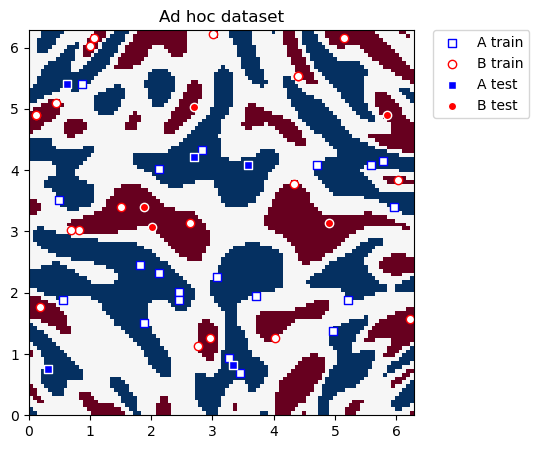

In [156]:
plot_dataset(train_features, train_labels, test_features, test_labels, adhoc_total)

In [162]:
adhoc_dimension = 2
train_features, train_labels, test_features, test_labels, adhoc_total = ad_hoc_data(
    training_size=25,
    test_size=0,
    n=adhoc_dimension,
    gap=0.6,
    plot_data=False,
    one_hot=False,
    include_sample_total=True,
)

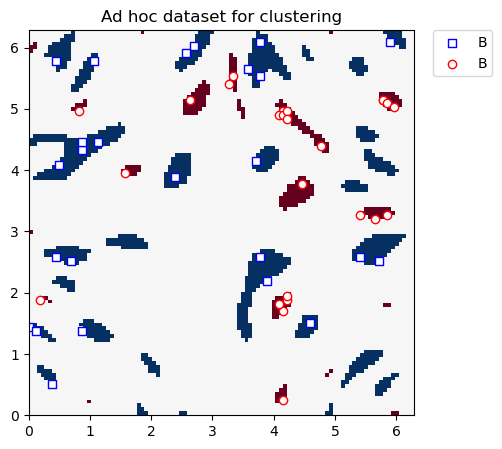

In [163]:
plt.figure(figsize=(5, 5))
plt.ylim(0, 2 * np.pi)
plt.xlim(0, 2 * np.pi)
plt.imshow(
    np.asmatrix(adhoc_total).T,
    interpolation="nearest",
    origin="lower",
    cmap="RdBu",
    extent=[0, 2 * np.pi, 0, 2 * np.pi],
)

# A label plot
plot_features(plt, train_features, train_labels, 0, "s", "w", "b", "B")

# B label plot
plot_features(plt, train_features, train_labels, 1, "o", "w", "r", "B")

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
plt.title("Ad hoc dataset for clustering")

plt.show()

In [164]:
from qiskit.circuit.library import ZZFeatureMap
from qiskit.primitives import Sampler
from qiskit.algorithms.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel

adhoc_feature_map = ZZFeatureMap(feature_dimension=adhoc_dimension, reps=2, entanglement="linear")

adhoc_kernel = FidelityQuantumKernel(feature_map=adhoc_feature_map)

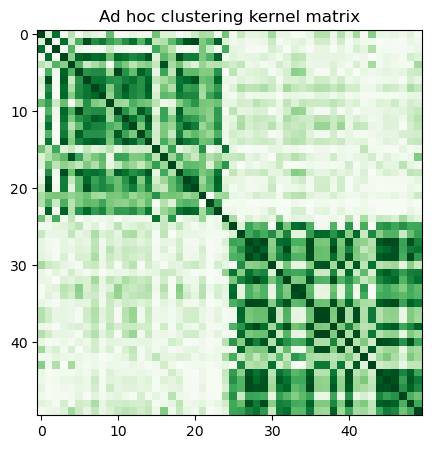

In [165]:
adhoc_matrix = adhoc_kernel.evaluate(x_vec=train_features)

plt.figure(figsize=(5, 5))
plt.imshow(np.asmatrix(adhoc_matrix), interpolation="nearest", origin="upper", cmap="Greens")
plt.title("Ad hoc clustering kernel matrix")
plt.show()

In [166]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import normalized_mutual_info_score

adhoc_spectral = SpectralClustering(2, affinity="precomputed")

cluster_labels = adhoc_spectral.fit_predict(adhoc_matrix)

cluster_score = normalized_mutual_info_score(cluster_labels, train_labels)

print(f"Clustering score: {cluster_score}")

Clustering score: 0.8782063702756282
